<a href="https://colab.research.google.com/github/Isi2000/NX/blob/main/NBA_GRAPHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict

In [2]:
!git clone https://github.com/Isi2000/NX.git

Cloning into 'NX'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 2), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 5.34 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
df_MVP = pd.read_csv('/content/NX/MVP_2022_2023.txt', sep = '\t', skiprows=[0])

In [4]:
B = nx.Graph()

In [5]:
B.add_nodes_from(df_MVP['Voter'], bipartite = 0)
for col_name in df_MVP.columns[2:]:
  B.add_nodes_from(df_MVP[col_name], bipartite = 1)
print(B)

Graph with 113 nodes and 0 edges


In [6]:
dumb_map = {1: 10, 2: 7, 3: 5, 4: 3, 5: 1} #becaus it is easier to extract weight from position
for idx, row in df_MVP.iterrows():
  voter_node = row['Voter']
  for col_name in df_MVP.columns[2:]:
    nominee_node = row[col_name]
    B.add_edge(voter_node, nominee_node, weight = dumb_map[int(col_name[0])])

In [7]:
#gradient of blues
color_map = {10: '#336699', 7: '#5a92bd', 5: '#8bb0d0', 3: '#b3cde3', 1: '#dcecf9'}
color_edges = [color_map[B[u][v]['weight']] for u,v in B.edges()]
edge_weights = [(B[u][v]['weight']/10) for u,v in B.edges()]

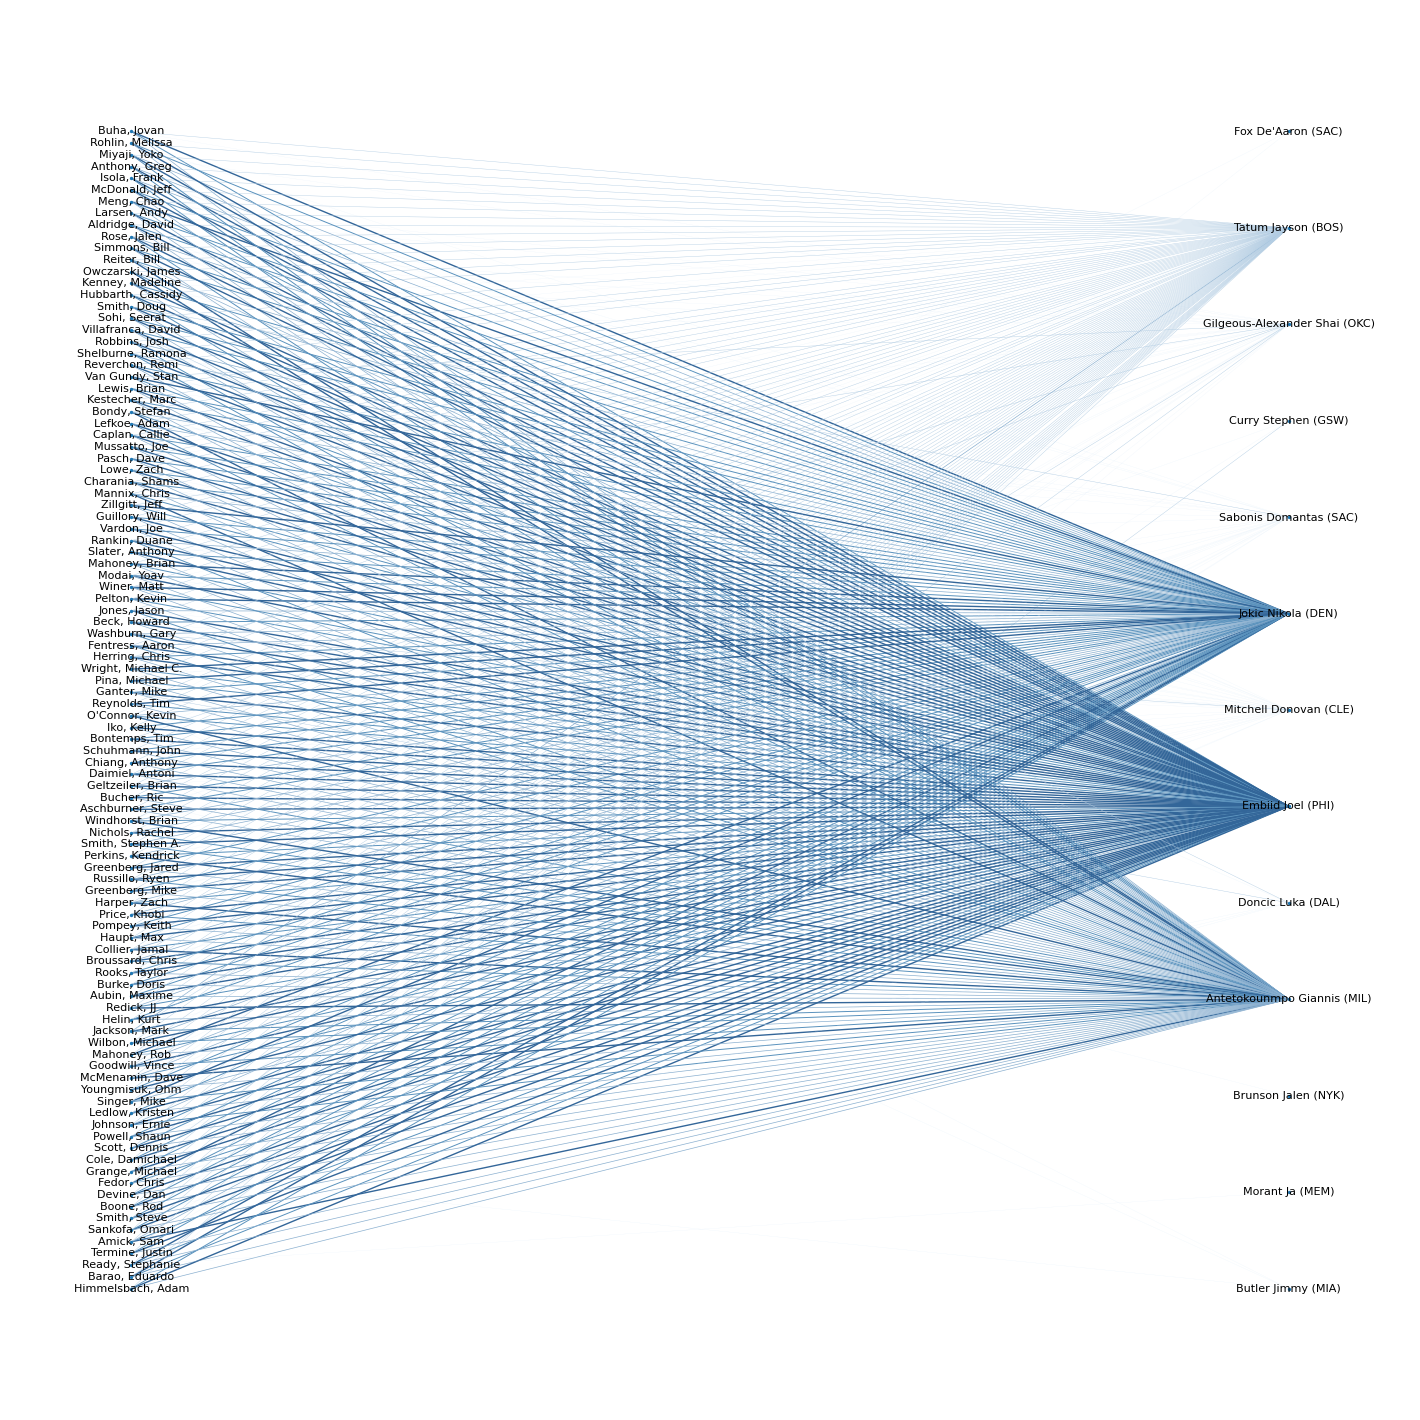

In [10]:
pos = nx.bipartite_layout(B, df_MVP['Voter'])
plt.figure(figsize=(14, 14)) #change the fisize when ready to plot well
nx.draw(B, pos,  with_labels=True, font_size=8, node_size=2, edge_color = color_edges, width = edge_weights)
plt.show()

In [11]:
nx.is_bipartite(B)

True

# Network analysis

Before taking any deep consideration on the network we must first analyze the data according to the standard metrics to ge to get a better feeling

In [12]:
# 1. Top players based on total weight
player_weights = defaultdict(int)
for u, v, data in B.edges(data=True):
    if B.nodes[u]['bipartite'] == 1:  # u is a player
        player_weights[u] += data['weight']
    else:
        player_weights[v] += data['weight']

sorted_players = sorted(player_weights.items(), key=lambda x: x[1], reverse=True)
print("Top players based on points:")
for player, weight in sorted_players[:10]:
    print(f"{player}: {weight} points")

Top players based on points:
Embiid Joel (PHI): 915 points
Jokic Nikola (DEN): 674 points
Antetokounmpo Giannis (MIL): 606 points
Tatum Jayson (BOS): 280 points
Gilgeous-Alexander Shai (OKC): 46 points
Mitchell Donovan (CLE): 30 points
Sabonis Domantas (SAC): 27 points
Doncic Luka (DAL): 10 points
Curry Stephen (GSW): 5 points
Butler Jimmy (MIA): 3 points


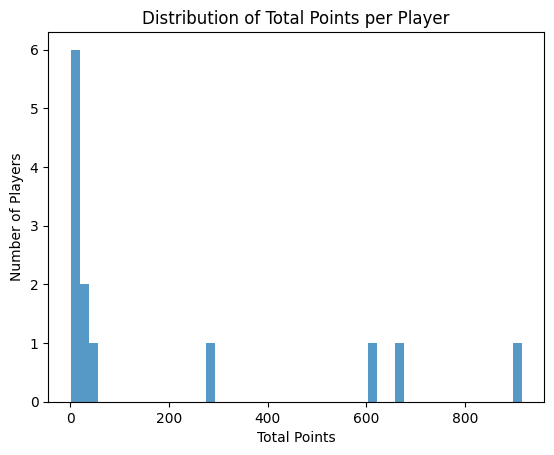

In [13]:
plt.hist(player_weights.values(), bins=50, alpha=0.75)
plt.title("Distribution of Total Points per Player")
plt.xlabel("Total Points")
plt.ylabel("Number of Players")
plt.show()

In [14]:
positions = defaultdict(lambda: defaultdict(int))

for idx, row in df_MVP.iterrows():
    for col_idx, col_name in enumerate(df_MVP.columns[2:], 1):
        nominee_node = row[col_name]
        positions[nominee_node][col_idx] += 1

for player, pos_dict in positions.items():
    print(f"{player}: {pos_dict}")


Embiid Joel (PHI): defaultdict(<class 'int'>, {1: 73, 2: 25, 3: 2})
Jokic Nikola (DEN): defaultdict(<class 'int'>, {2: 52, 3: 32, 1: 15})
Antetokounmpo Giannis (MIL): defaultdict(<class 'int'>, {3: 65, 1: 12, 2: 23})
Tatum Jayson (BOS): defaultdict(<class 'int'>, {4: 89, 5: 8, 3: 1})
Mitchell Donovan (CLE): defaultdict(<class 'int'>, {5: 27, 4: 1})
Sabonis Domantas (SAC): defaultdict(<class 'int'>, {5: 24, 4: 1})
Gilgeous-Alexander Shai (OKC): defaultdict(<class 'int'>, {5: 28, 4: 6})
Curry Stephen (GSW): defaultdict(<class 'int'>, {4: 1, 5: 2})
Brunson Jalen (NYK): defaultdict(<class 'int'>, {5: 1})
Butler Jimmy (MIA): defaultdict(<class 'int'>, {5: 3})
Doncic Luka (DAL): defaultdict(<class 'int'>, {5: 4, 4: 2})
Fox De'Aaron (SAC): defaultdict(<class 'int'>, {5: 2})
Morant Ja (MEM): defaultdict(<class 'int'>, {5: 1})


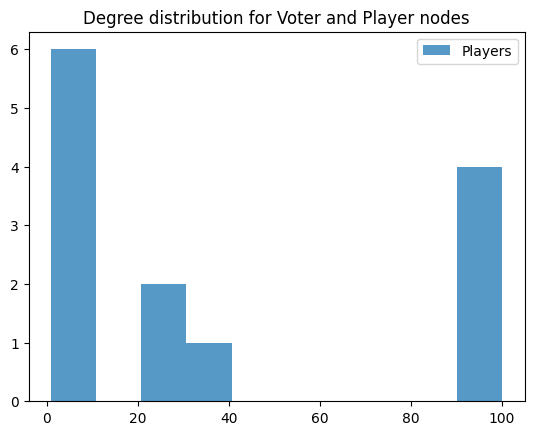

In [15]:
voters_degree = [d for n, d in B.degree() if B.nodes[n]['bipartite'] == 0]
players_degree = [d for n, d in B.degree() if B.nodes[n]['bipartite'] == 1]


plt.figure()
plt.hist(players_degree, alpha=0.75, label="Players")
plt.title("Degree distribution for Voter and Player nodes")
plt.legend()
plt.show()